## 1. Connexion à la base de données

In [3]:
import pandas as pd
import database
import matplotlib.pyplot as plt
import seaborn as sns

df = database.main()
df.drop_duplicates(keep='first', inplace=True)
print(df.head)

<bound method NDFrame.head of                                                   title              company  \
0                               Data Analyst internship         PGBPGNGLOBAL   
1                               Senior Data Analyst H/F                Qonto   
2                                          Data Analyst                 Jump   
3                                          Data analyst              Oh BiBi   
4                                  Product Data Analyst            leboncoin   
...                                                 ...                  ...   
1474                                       Data Analyst        BI consulting   
1476  Data Business Analyst - Acteur Majeur du Monde...  Michael Page France   
1477                        Data analyst confirmé (H/F)           Talents IT   
1478                    Data Analyst Intern - Paris H/F            Papernest   
1479            Business and Data Analyst Finance (H/F)     Sercanto Partner   

         

## 2. Définir les compétences des offres d'emploi

In [27]:
import re
# Load keywords from a CSV file without headers
keywords_df = pd.read_csv('skills.csv', header=None)  # Replace 'keywords.csv' with your file path
keyword_list = keywords_df[0].tolist()

# Function to find keywords in the description
def find_keywords(description, skills_list):
    contained_skills = []
    for skill in skills_list:
        # Create a regex pattern that matches the skill with word boundaries
        pattern = r'\b' + re.escape(skill) + r'\b'
        if re.search(pattern, description, re.IGNORECASE):
            contained_skills.append(skill)
    return ', '.join(contained_skills)

# Apply the function to create the new column
df['skills'] = df['description'].apply(lambda desc: find_keywords(desc, keyword_list))
print(df.head)

<bound method NDFrame.head of                                                   title              company  \
0                               Data Analyst internship         PGBPGNGLOBAL   
1                               Senior Data Analyst H/F                Qonto   
2                                          Data Analyst                 Jump   
3                                          Data analyst              Oh BiBi   
4                                  Product Data Analyst            leboncoin   
...                                                 ...                  ...   
1474                                       Data Analyst        BI consulting   
1476  Data Business Analyst - Acteur Majeur du Monde...  Michael Page France   
1477                        Data analyst confirmé (H/F)           Talents IT   
1478                    Data Analyst Intern - Paris H/F            Papernest   
1479            Business and Data Analyst Finance (H/F)     Sercanto Partner   

         

## 3. Compétences les plus demandées

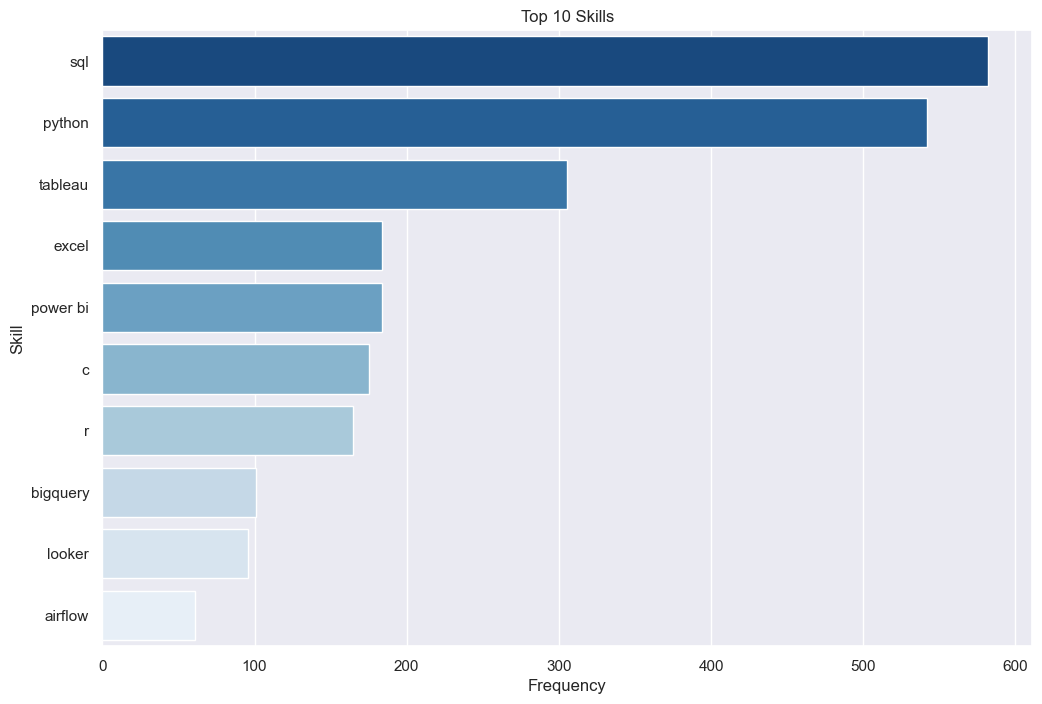

In [33]:
# Create a new DataFrame with the skills and their frequencies
skills_df = df['skills'].str.get_dummies(sep=', ')
skills_frequencies = skills_df.sum().sort_values(ascending=False)

# Get the top 10 skills
top_10_skills = skills_frequencies.head(10)

# Plotting the top 10 skills
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_skills.values, y=top_10_skills.index, palette="Blues_r")
plt.title('Top 10 Skills')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()


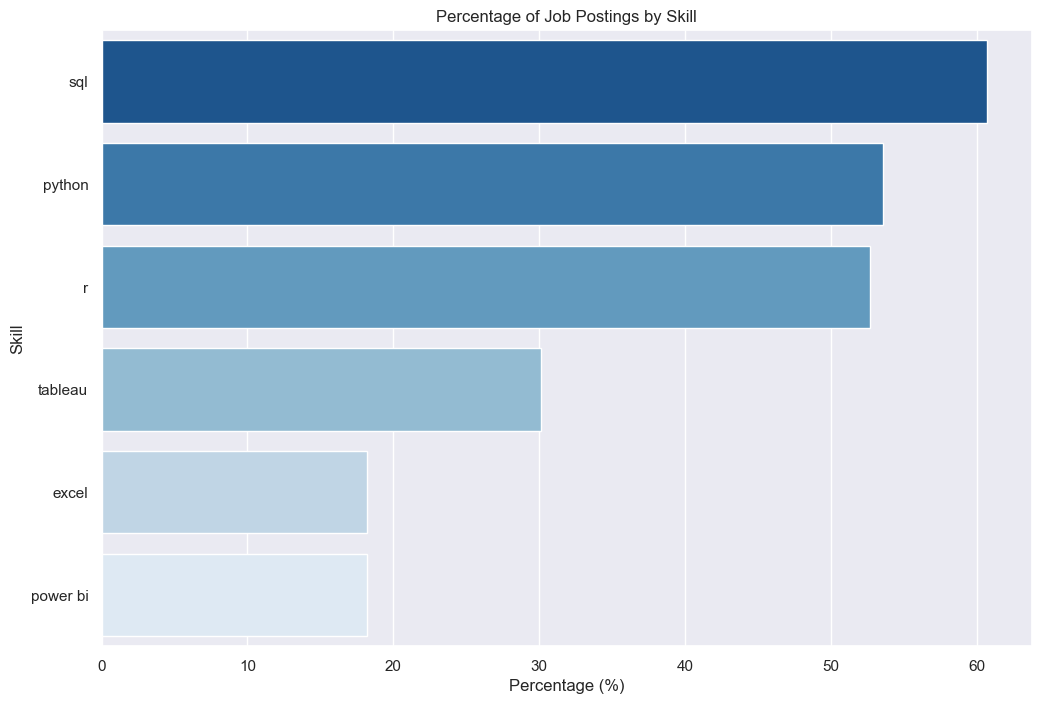

In [36]:
# List of selected skills
selected_skills = ['sql', 'excel', 'python', 'r', 'tableau', 'power bi']

# Count occurrences of each skill
skills_count = {skill: sum(df['skills'].apply(lambda x: skill in x)) for skill in selected_skills}

# Convert counts to percentages
total_postings = len(df)
skills_percentage = {skill: (count / total_postings * 100) for skill, count in skills_count.items()}

# Data for plotting
skills_data = pd.DataFrame(list(skills_percentage.items()), columns=['Skill', 'Percentage']).sort_values(by='Percentage', ascending=False)

# Plotting the percentage of job postings by skill
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y='Skill', data=skills_data, palette="Blues_r")
plt.title('Percentage of Job Postings by Skill')
plt.xlabel('Percentage (%)')
plt.ylabel('Skill')
plt.show()

## 4. Correlation entre les compétences

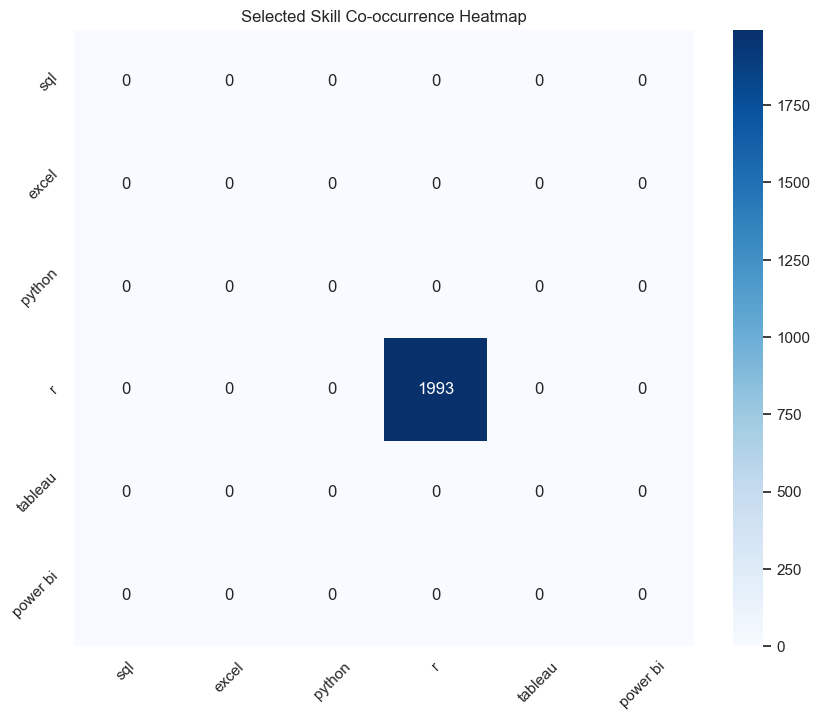

In [39]:
import numpy as np

selected_skills = [skill.lower() for skill in selected_skills]

# Step 1: Create the co-occurrence matrix for selected skills only
# Initialize a matrix of zeros
co_occurrence_matrix = pd.DataFrame(np.zeros((len(selected_skills), len(selected_skills))), index=selected_skills, columns=selected_skills)

# Populate the matrix
for skills_list in df['skills']:
    # Convert skills in the current list to lowercase
    skills_list = [skill.lower() for skill in skills_list]
    # Filter the skills in the current list to include only selected skills
    filtered_skills = [skill for skill in skills_list if skill in selected_skills]
    for skill1 in filtered_skills:
        for skill2 in filtered_skills:
            co_occurrence_matrix.at[skill1, skill2] += 1

# Step 2: Plot the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap="Blues", fmt='g')
plt.title('Selected Skill Co-occurrence Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


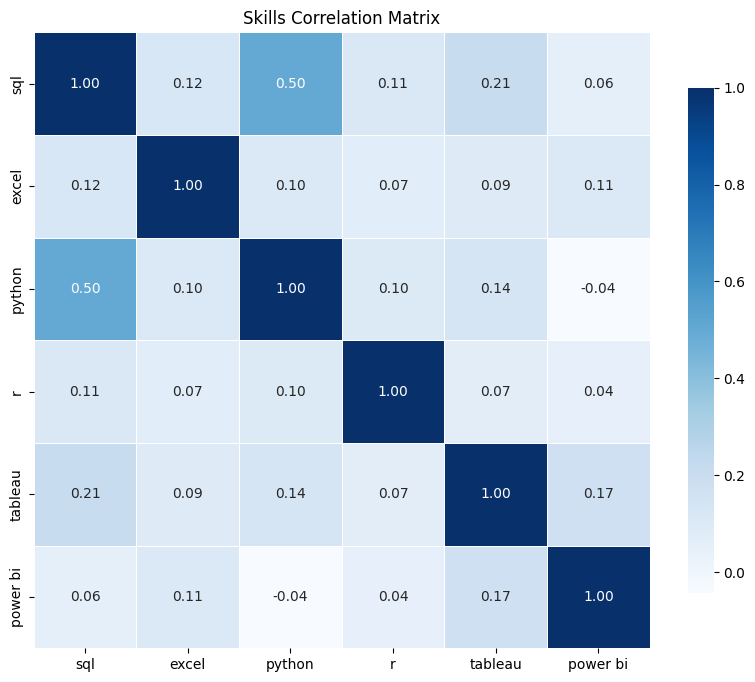

In [8]:
import numpy as np

# Initialize a DataFrame to store the presence (1) or absence (0) of each skill in each job description
skills_matrix = pd.DataFrame(0, index=df.index, columns=selected_skills)

# Populate the matrix with the presence or absence of skills
for skill in selected_skills:
    skills_matrix[skill] = df['description'].apply(lambda x: 1 if skill in x.lower() else 0)

# Calculate the correlation matrix
correlation_matrix = skills_matrix.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Skills Correlation Matrix')
plt.show()
